# __PARKING SPOT PREDICTOR__
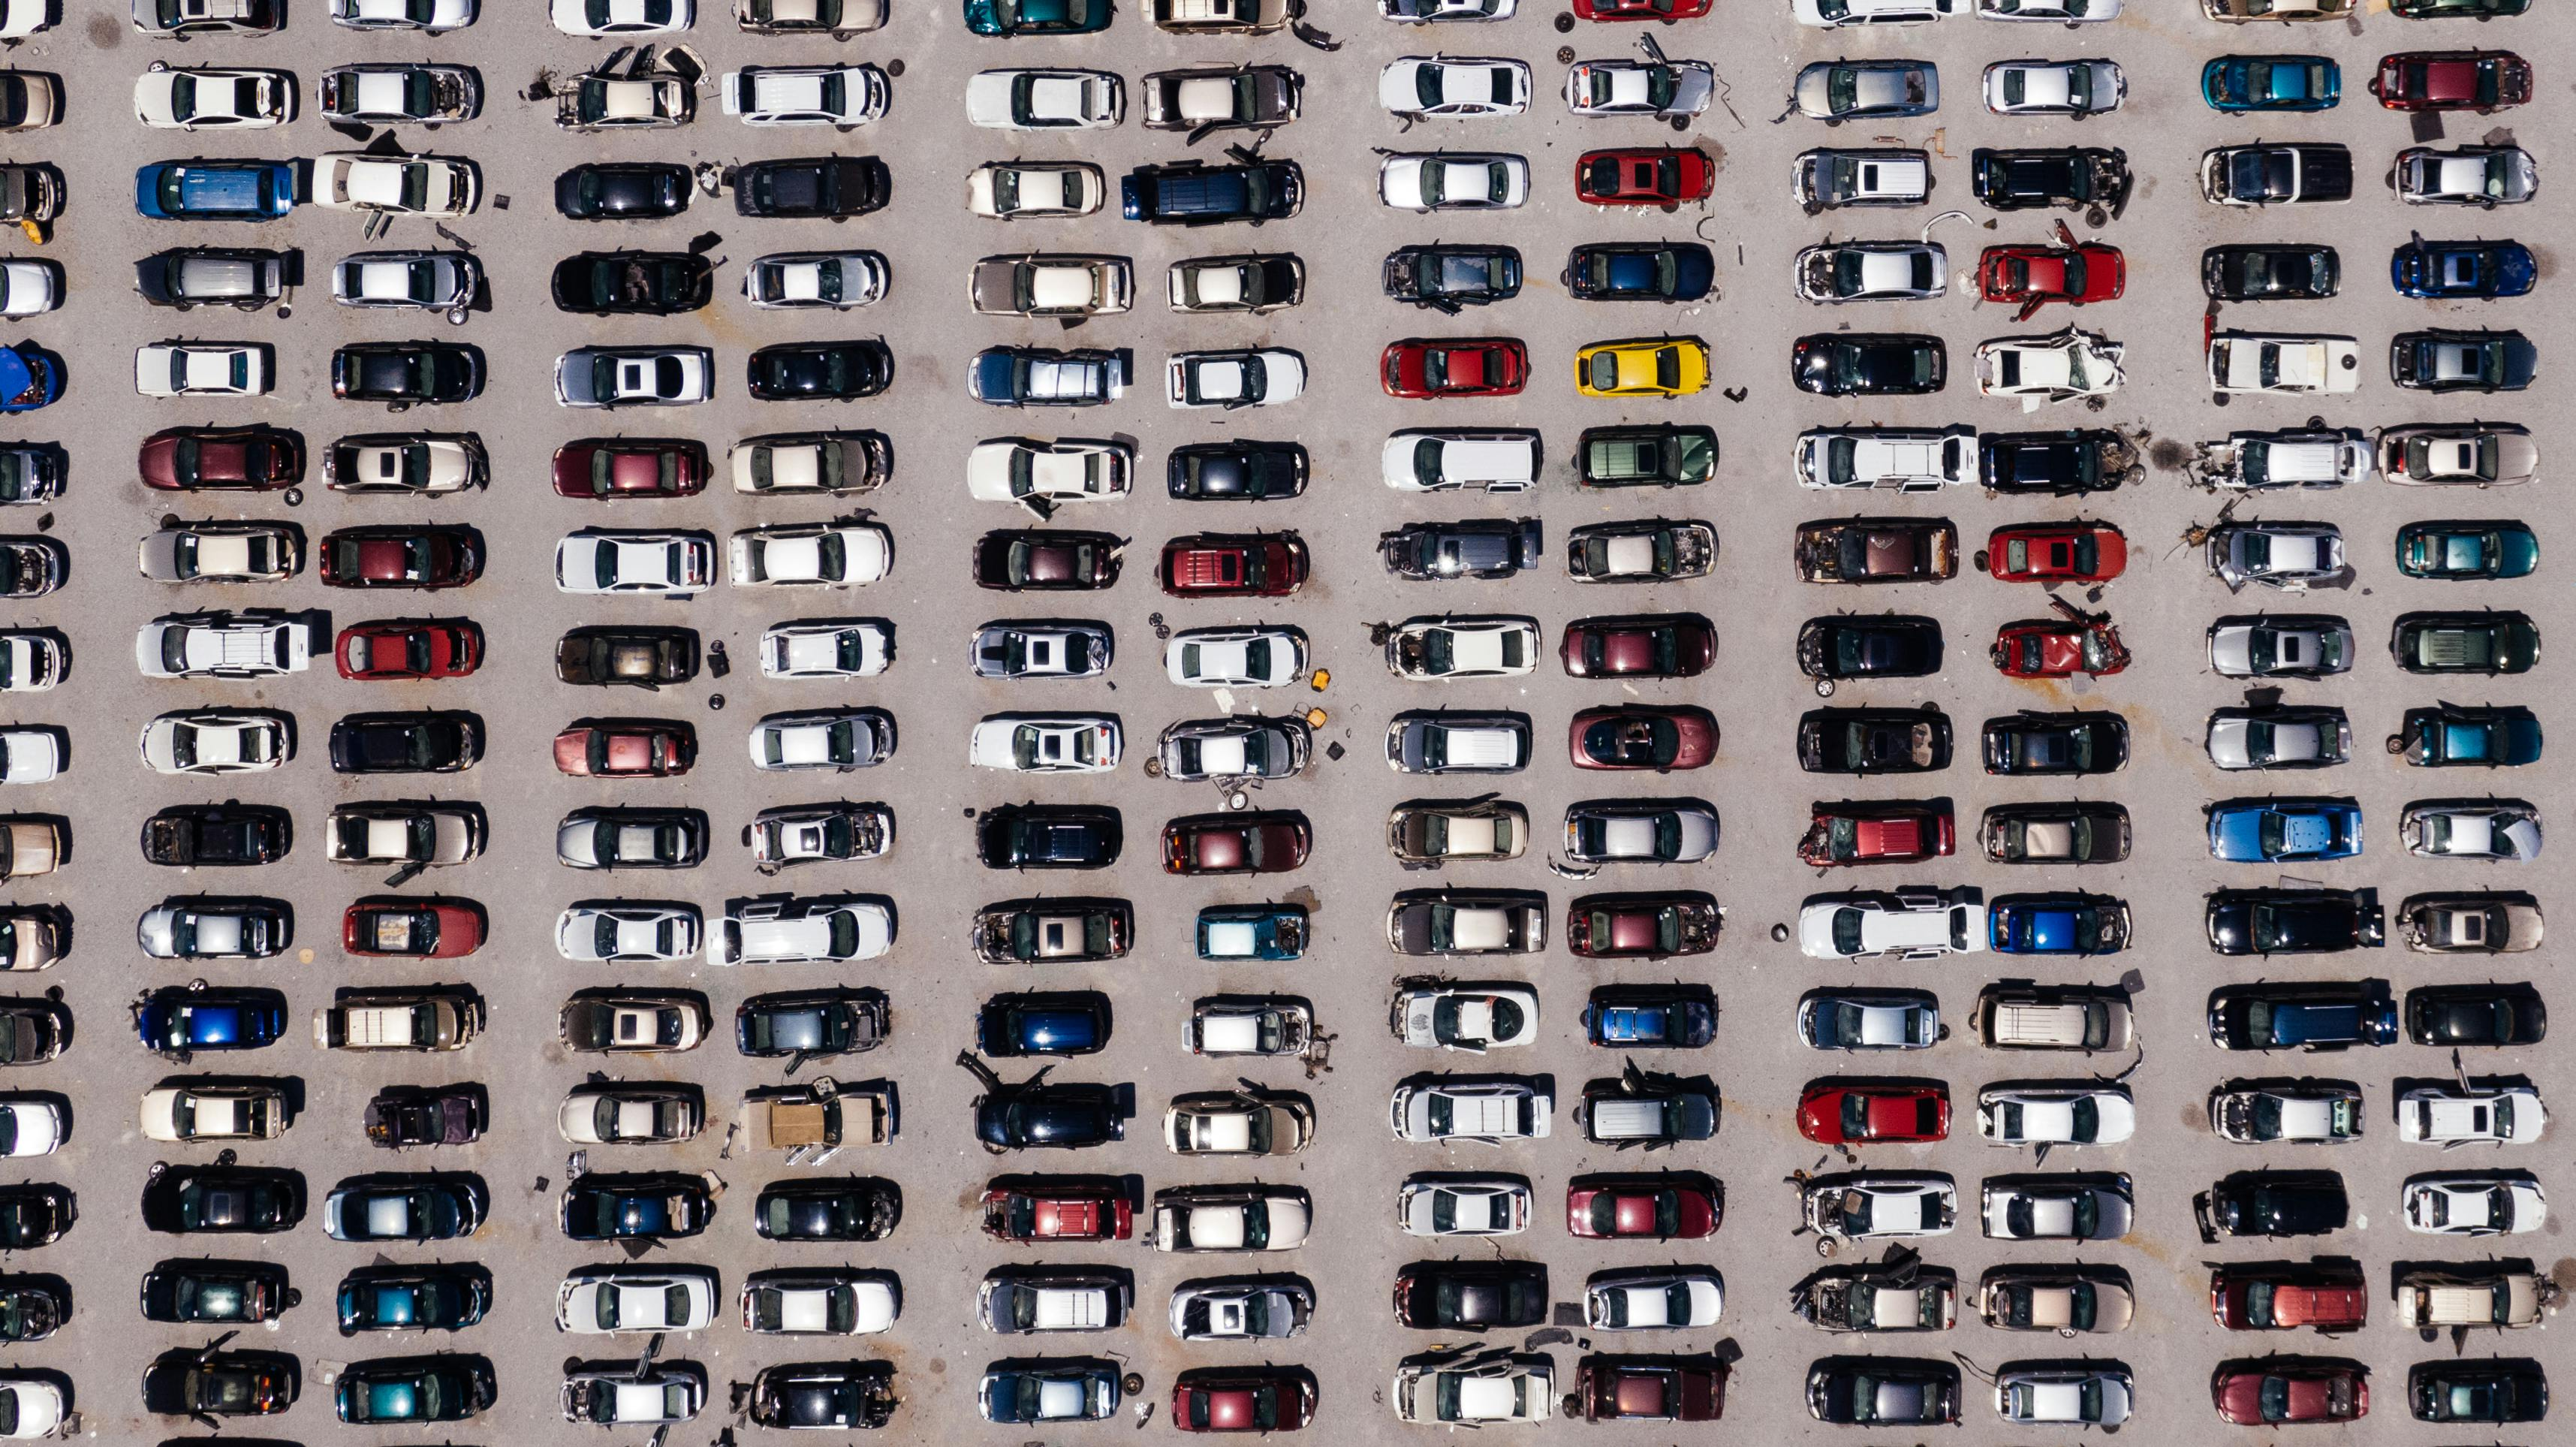

***
This is a collaborative group project done during Phase 5 of Moringa School's Data Science program. The team members of this group include:
1. [Ezra Kipchirchir](https://github.com/dev-ezzy)
2. [Grace Mutuku](https://github.com/GraceKoki)
3. [Joy Ogutu](https://github.com/Ogutu01)
4. [Mary Gaceri](https://github.com/MaryGaceri)
5. [Mwiti Mwongo](https://github.com/M13Mwongo)

***

## __INTRODUCTION__
Using data analytics and machine learning techniques, we explore the field of **parking prediction** and **urban mobility**. Our research develops a state-of-the-art algorithm that can effectively estimate parking spot availability in metropolitan locations by utilizing real-time parking occupancy data from several sources inclusive of historical records. We welcome you to journey with us as we explore the inner workings of our prediction model, emphasize significant discoveries, and demonstrate how it may revolutionize urban parking system optimization.

### __Table of contents__

- [Business Understanding](#PROJECT-OVERVIEW)
- [Data Understanding](#DATA-UNDERSTANDING)
- [Data Preprocessing](#DATA-PREPARATION)
- [Exploratory Data Analysis](#EXPLORATORY-DATA-ANALYSIS)
- [Generating a Recommendation System](#RECOMMENDATION-SYSTEM-GENERATION)
- [Conclusion and Recommendation](#Conclusion-and-Recommendation)

### __PROJECT OVERVIEW__
### __Business Understanding__
Finding a parking place in the busy urban environments of major cities throughout the world is a problem that worries locals, commuters, and tourists equally. The need for effective parking solutions is greater than ever due to the fast urbanization, rising traffic, and expanding population. Our initiative is to change parking management in metropolitan areas confronting comparable difficulties throughout the globe by utilizing data-driven insights in response to this urgent issue. It is impossible to exaggerate the significance of this endeavor for metropolitan areas. Urban centers are the epicenters of activity, drawing millions of people for business, pleasure, and employment because they are social, cultural, and economic magnets. Nonetheless, these cities' disorganized traffic and inadequate parking facilities provide serious difficulties for local government, companies, and citizens. Our initiative intends to improve urban mobility by reducing travel times, relieving traffic congestion, and offering accurate estimates of parking spot availability.

One of the key challenges lies in accessing reliable data on parking occupancy and usage patterns. Parking spaces in urban areas are often managed by various entities, including public agencies, private operators, and informal attendants, making data collection a complex and fragmented process. Moreover, concerns about data privacy and security have hindered efforts to gather comprehensive parking data, as authorities are cautious about disclosing sensitive information due to security reasons.

Despite these challenges, our project aims to collaborate with relevant stakeholders, including:

- **City authorities**: Vital for regulatory support, infrastructure planning, and policy implementation to enhance urban mobility and parking management.
- **Parking operators**: Key players responsible for managing parking facilities, providing valuable data, and implementing innovative solutions to optimize parking spot utilization.
- **Technology partners**: Essential for developing and implementing data-driven tools, such as predictive models and smart parking systems, to improve parking availability and streamline operations.
- **Motorists (end-users)**: The primary beneficiaries of improved parking management solutions, as they will benefit from reduced search time, enhanced convenience, and better access to parking spots.

By fostering partnerships and promoting transparency, we seek to establish a data-sharing framework that respects privacy concerns while enabling the development of innovative solutions to improve parking management in urban centers worldwide. Optimizing parking and reducing congestion, enhances business efficiency, attracts investments, and stimulates economic activity. Encouraging alternative transportation modes reduces emissions and contributes to environmental conservation. Through data analytics, stakeholder collaboration, and innovative tech, we aim to create smarter, more efficient urban mobility ecosystems benefiting all.

### __Problem Statement__
The absence of accurate and up-to-date data on parking spot availability not only impedes the development of effective predictive models but also limits the implementation of innovative solutions aimed at addressing urban mobility challenges. Without access to comprehensive data sources, parking prediction systems struggle to provide reliable real-time information, leading to suboptimal parking decisions and increased traffic congestion. Overcoming these challenges is crucial for creating a parking prediction system that not only improves parking navigation but also contributes to the overall sustainability and livability of urban areas by enhancing economic productivity, and fostering a more seamless urban mobility experience for all stakeholders.

## __Objectives__
**Main Objective:**
To develop a robust time series-based parking spot predictor that accurately forecasts parking spot availability in urban areas, leveraging historical parking data and real-time variables.

**Other Objectives:**
1. To collect and preprocess historical parking data from various sources and integrate relevant time-varying features, such as time of day, day of the week and holidays into the predictive model.

2. To explore various time series forecasting techniques, including ARIMA and SARIMA and evaluate the performance of each technique using metrics like accuracy, precision, recall, and F1-score. 

3. To develop and deploy a user-friendly interface or mobile application that allows motorists to access real-time parking predictions and navigate to available parking spots efficiently.


# __DATA UNDERSTANDING__
## __a) Process of fetching data__
Our data was sourced from the Transport for New South Wales(TfNSW) website, more speficially, from their [Car Park API](https://opendata.transport.nsw.gov.au/dataset/car-park-api).

The API - whose base URL was `https://api.transport.nsw.gov.au/v1/carpark` - had two endpoints:
1. `{baseURL}?facility={facility_id}` - Containts one optional variable ***facility_id***. Returns occupancy details of a car park based on a facility ID. If the facility ID is specified, a list of facility names with their ID will be returned.
2. `{baseURL}}/history?facility={facility_id}&eventdate={date_in_question}` - Contains two mandatory variables, ***facility_id*** and ***date_in_question*** formatted as *YYYY-MM-DD*. Returns historical occupancy details of a car park based on a facility ID
and event date. 

The team initially planned to utilize an API to retrieve historical parking data spanning six months. This extended timeframe would provide comprehensive insights into parking behaviors under various circumstances, including holidays and other relevant factors. We developed a code to automate API requests and store the retrieved information in a DataFrame. However, upon closer examination of the API's structure and the received data, it was decided to make these requests once and store the resulting data in JSON files, which can be easily read using pandas.

Below is the function used to fetch car park data from the TfNSW API and save it to a JSON file. Subsequently, the JSON file is read into a DataFrame, with columns renamed as necessary since the API provides data without column names.

```py
def get_carparks_list():
  dotenv.load_dotenv('.env')
  # path to json file created/saved
  carparks_file_path = './data/carparks_original.json'
  # Delete any existing file at carparks path
  os.remove(carparks_file_path) if os.path.exists(carparks_file_path) else None

  # Creating header for request
  headers = {
      "Authorization": f"apikey {os.environ.get('apikey')}"
  }
  # Specifying url to get carparks
  url_carparks = 'https://api.transport.nsw.gov.au/v1/carpark'

  list_of_carparks = requests.get(url_carparks, headers=headers).json()

  df_carparks = pd.DataFrame.from_dict(list_of_carparks, orient='index')
  # Resetting the index to label the columns afterwards
  df_carparks = df_carparks.reset_index()
  df_carparks.columns = ['facility_id', 'CarParkName']

  # Deleting old file
  os.remove(carparks_file_path) if os.path.exists(carparks_file_path) else None

  # Creating new file with updated column titles
  pd.DataFrame.to_json(df_carparks, carparks_file_path)
print('File created and updated successfully.')
  return
```

Although a comprehensive list of all car parks was available, not all of them would be utilized due to incomplete or inaccurate information for certain columns, as indicated by the API. Consequently, records for these car parks with facility IDs ranging between `486` and `490` (inclusive) were deemed unnecessary and were removed from the `carparks_original.json` file. The following function was employed to perform this removal.

```python
# Dropping rows 28,29,30,31,32
df_carpark_details.drop(index=[28,29,30,31,32],inplace=True)

# Resetting the index
df_carpark_details.reset_index(drop=True,inplace=True)

# Sorting by facility_id
df_carpark_details.sort_values(by='facility_id',inplace=True)
df_carpark_details
```

Upon obtaining the names of various facilities, the team delved into the structure of each car park. It was observed that each car park could have a unique configuration, with each facility potentially comprising one or more car parks, and each car park potentially containing one or more zones, as illustrated below.
<div style="text-align:center">
<img src='./images/carpark_structure.png' alt='Carpark structure'>
</div>

With this understanding, the team developed the following function to retrieve the individual details of the car parks, utilizing the previously created JSON file. This process enabled a thorough examination of their structure, which was then saved in a separate JSON file named `carpark_structure.json` for future reference.
```py
def get_carpark_structure(path_to_carpark_json_file):
  # Delete file found at same path
  os.remove('./data/carpark_structure.json') if os.path.exists('./data/carpark_structure.json') else None
  # Add file to dataframe
  df_carparks = pd.read_json(path_to_carpark_json_file)
  # Initialise array that will hold information
  carpark_details_array = []

  # Loop through carparks to get information
  for index, row in df_carparks.iterrows():
    facility = row['facility_id']
    url = f'https://api.transport.nsw.gov.au/v1/carpark?facility={facility}'

    # Creating header for request
    headers = {
        "Authorization": f"apikey {os.environ.get('apikey')}"
    }
    # Make request
    response = requests.get(url, headers=headers).json()

    # Add to array
    carpark_details_array.append(response)

  # Store information in JSON file
  with open('./data/carpark_structure.json', 'w') as f:
    json.dump(carpark_details_array, f)
  # Create dataframe and return it
  return pd.DataFrame(carpark_details_array)
```

Following this, a new function called `date_getter` was developed to generate a list containing all the days within a specified time period. This function proves essential as it provides the necessary dates for retrieving car park history within a given time delta.

```py
def date_getter(td):
    """
    Generate a list of dates based on the input time delta.

    Args:
    td (timedelta): The time delta to subtract from the cutoff date.

    Returns:
    list: A list of dates in the format "YYYY-MM-DD".
    """
    # Array that stores the dates to be searched for
    date_period_list = []

    # The last date to be searched for
    cutoff_date = datetime(2023, 12, 31)
    target_date = cutoff_date - td

    # Ensure that records of each day are obtained
    delta = timedelta(days=1)

    while target_date <= cutoff_date:
        date_period_list.append(target_date.strftime("%Y-%m-%d"))
        target_date += delta

    return date_period_list
```

Having a date function, a new function (`get_carpark_history`) was made to fetch the carpark history of a particular facility across a range of dates.

```python
def get_carpark_history(facility, dates_array):
    """
    Get carpark history data for a specific facility and dates.

    Args:
    facility (str): The name of the carpark facility.
    dates_array (list): List of dates for which to retrieve carpark history data.

    Returns:
    pandas.DataFrame: DataFrame containing the carpark history data.
    """
    # Initialize data array
    data_array = []

    # Define the path for the JSON file
    json_file_path = f"./data/carpark history/facility_{facility}.json"

    # Set the request header
    headers = {
        "Authorization": f"apikey {os.environ.get('apikey')}"
    }

    # Delete the file if it exists
    if os.path.exists(json_file_path):
        os.remove(json_file_path)

    # Make a request for each date and aggregate the data
    for date in dates_array:
        url = f'https://api.transport.nsw.gov.au/v1/carpark/history?facility={facility}&eventdate={date}'
        response = requests.get(url, headers=headers).json()

        if data_array == []:
            data_array = response
        else:
            data_array = data_array + response

    # Save the data to a JSON file
    with open(json_file_path, 'w') as f:
        json.dump(data_array, f)

    # Read the JSON file
    with open(json_file_path) as f:
        data = json.load(f)

    # Convert the read data into a pandas DataFrame
    return pd.DataFrame(data)
```



## __DATA PREPROCESSING AND CLEANING__

## __EXPLORATORY DATA ANALYSIS__

In [5]:
import pandas as pd

final_df = pd.read_csv("df.csv")

In [6]:
# Assuming 'date' column is in the format 'YYYY-MM-DD'
# Convert 'date' column to datetime object
final_df['date'] = pd.to_datetime(final_df['date'])

# Extract month name from the 'date' column and assign it to a new 'month' column
final_df['month'] = final_df['date'].dt.strftime('%B')

# Display the DataFrame with the new 'month' column
final_df

,facility_id,facility_name,ParkID,zone_id,total_parking_spots,occupancy_total,day_of_week,date,time,parking_availability,time_category,z_score,is_holiday,longitude,latitude,month
0,11,Narrabeen Car Park,1,1,46,3,Sunday,2023-07-09,00:03:25,43,Night,-0.913345,No,-33.713514,151.297315,July
1,11,Narrabeen Car Park,1,1,46,3,Sunday,2023-07-09,00:13:27,43,Night,-0.913345,No,-33.713514,151.297315,July
2,11,Narrabeen Car Park,1,1,46,3,Sunday,2023-07-09,00:23:29,43,Night,-0.913345,No,-33.713514,151.297315,July
3,11,Narrabeen Car Park,1,1,46,3,Sunday,2023-07-09,00:33:30,43,Night,-0.913345,No,-33.713514,151.297315,July
4,11,Narrabeen Car Park,1,1,46,3,Sunday,2023-07-09,00:43:32,43,Night,-0.913345,No,-33.713514,151.297315,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599280,9,Revesby Car Park,1,1,934,52,Sunday,2023-12-31,23:19:07,882,Night,1.217343,No,-33.952460,151.014838,December
599281,9,Revesby Car Park,1,1,934,51,Sunday,2023-12-31,23:21:53,883,Night,1.219883,No,-33.952460,151.014838,December
599282,9,Revesby Car Park,1,1,934,51,Sunday,2023-12-31,23:31:53,883,Night,1.219883,No,-33.952460,151.014838,December
599283,9,Revesby Car Park,1,1,934,51,Sunday,2023-12-31,23:41:54,883,Night,1.219883,No,-33.952460,151.014838,December


## __Total Number of Parking Spots in each Facility__

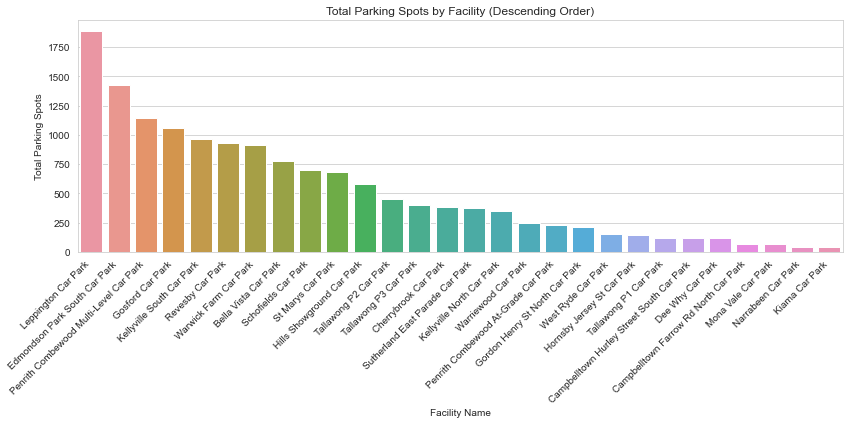

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by facility name and sum the total parking spots
facility_parking_spots = final_df.groupby('facility_name')['total_parking_spots'].first().reset_index()

# Sort the DataFrame by total parking spots in descending order
facility_parking_spots = facility_parking_spots.sort_values(by='total_parking_spots', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='facility_name', y='total_parking_spots', data=facility_parking_spots)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Facility Name')
plt.ylabel('Total Parking Spots')
plt.title('Total Parking Spots by Facility (Descending Order)')
plt.tight_layout()
plt.show()



## __Average Occupancy Total for each Month for each Facility__

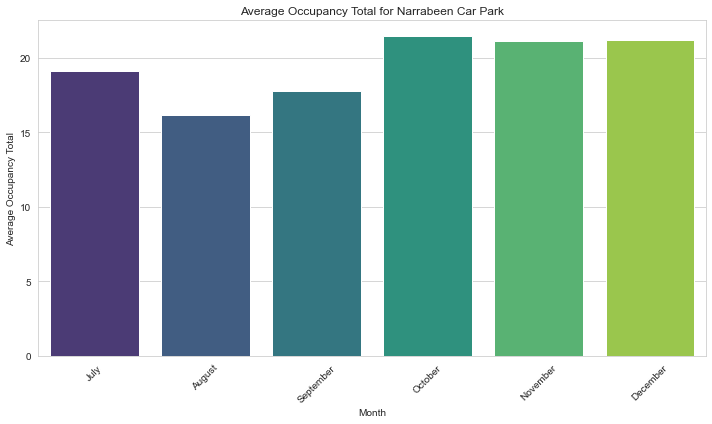

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the Narrabeen Car Park facility
narrabeen_data = final_df[final_df['facility_name'] == 'Narrabeen Car Park']

# Group the data by month and calculate the average occupancy total
narrabeen_month_avg = narrabeen_data.groupby('month')['occupancy_total'].mean().reset_index()

# Set the style of the plot
sns.set_style("whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=narrabeen_month_avg, x='month', y='occupancy_total', palette='viridis')
plt.title('Average Occupancy Total for Narrabeen Car Park')
plt.xlabel('Month')
plt.ylabel('Average Occupancy Total')
plt.xticks(ticks=range(6), labels=['July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # List of unique facility names
# facility_names = final_df['facility_name'].unique()

# # Set the style of the plot
# sns.set_style("whitegrid")

# # Create subplots
# fig, axes = plt.subplots(nrows=len(facility_names), ncols=1, figsize=(10, len(facility_names) * 5), sharex=True)

# # Iterate over each facility name
# for i, facility_name in enumerate(facility_names):
#     # Filter data for the current facility
#     facility_data = final_df[final_df['facility_name'] == facility_name]
    
#     # Group the data by month and calculate the average occupancy total
#     facility_month_avg = facility_data.groupby('month')['occupancy_total'].mean().reset_index()
    
#     # Create bar plot for the current facility
#     sns.barplot(data=facility_month_avg, x='month', y='occupancy_total', palette='viridis', ax=axes[i])
    
#     # Set title and labels for the current subplot
#     axes[i].set_title(f'Average Occupancy Total for {facility_name}')
#     axes[i].set_xlabel('Month')
#     axes[i].set_ylabel('Average Occupancy Total')
#     axes[i].set_xticks(range(6))
#     axes[i].set_xticklabels(['July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
#     axes[i].tick_params(axis='x', labelrotation=45)
#     axes[i].grid(True)

# # Adjust layout
# plt.tight_layout()
# plt.show()


## __Average Occupancy Total per Day for each Facility__

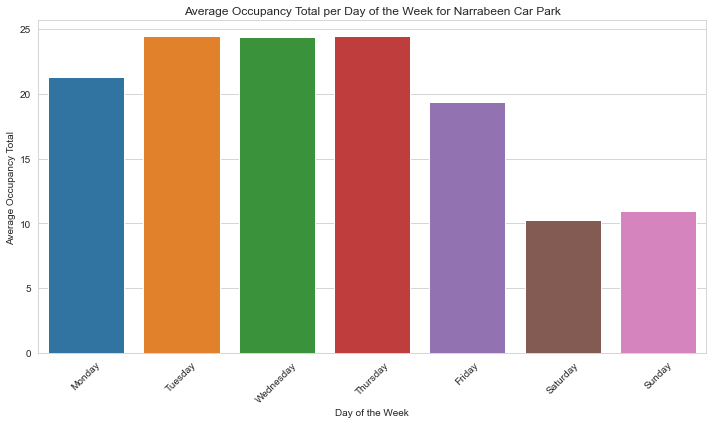

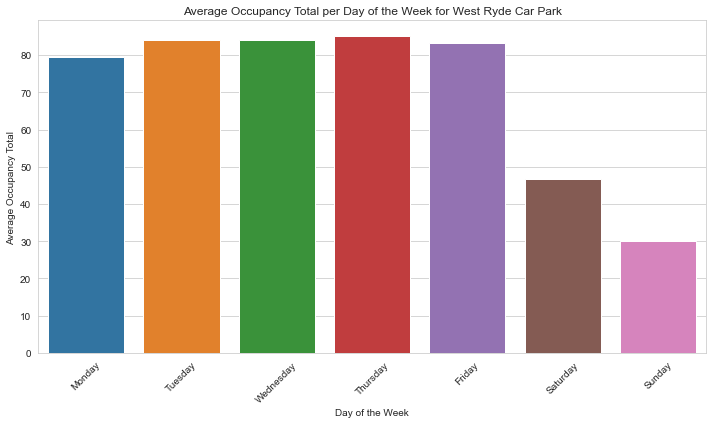

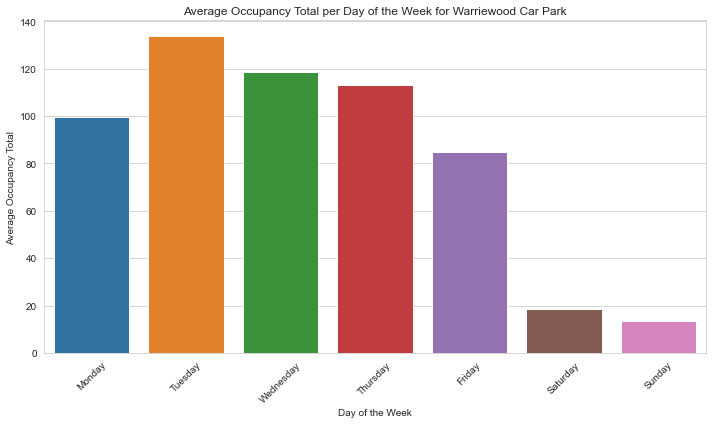

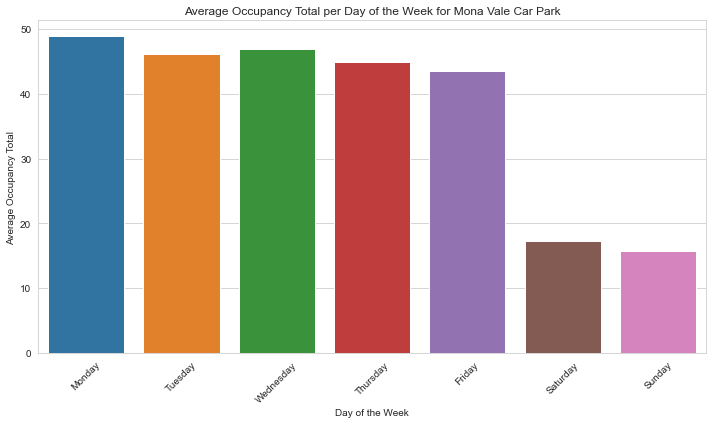

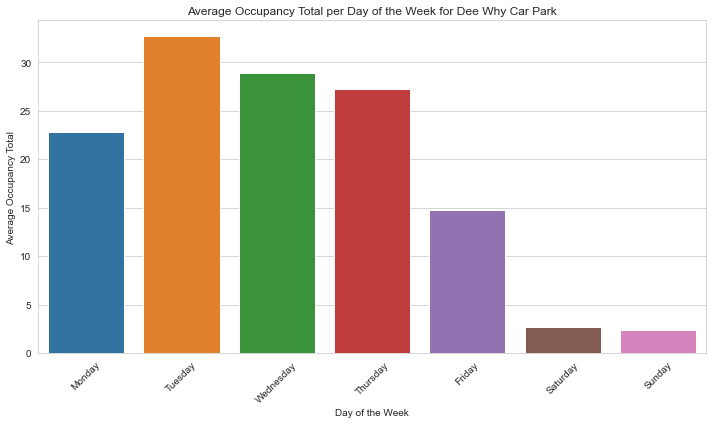

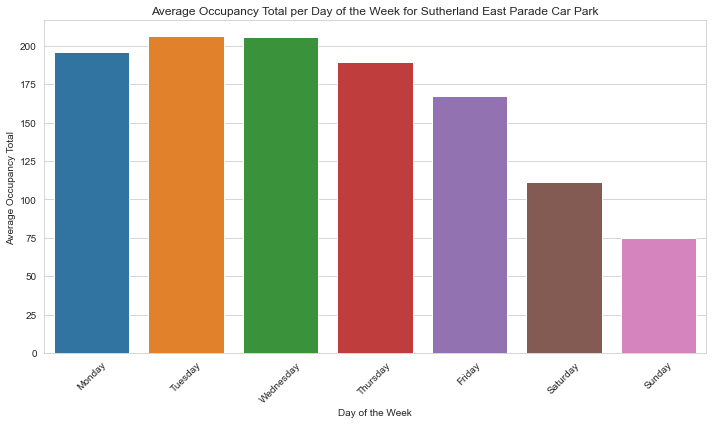

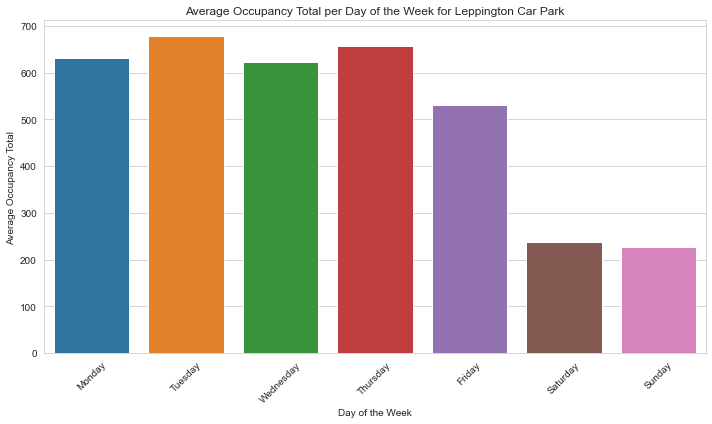

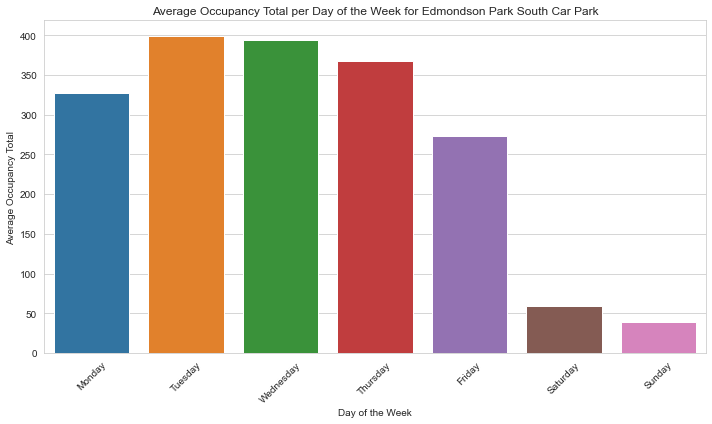

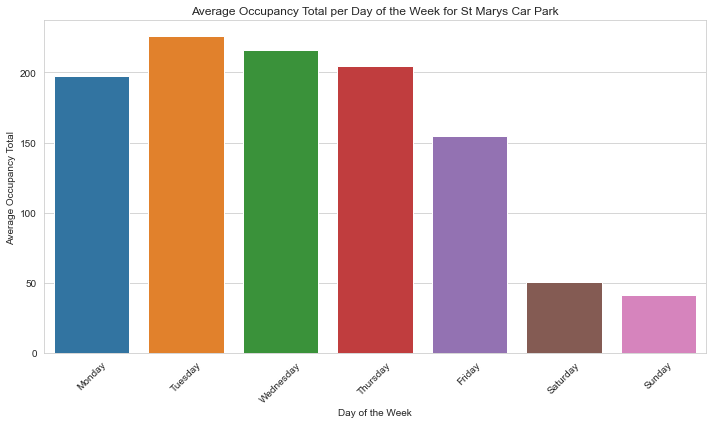

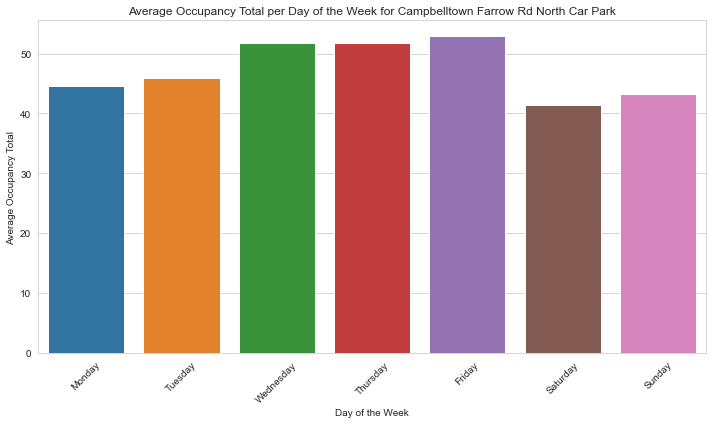

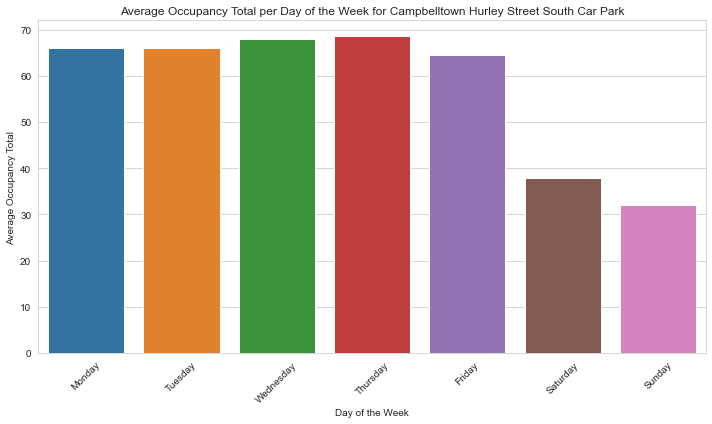

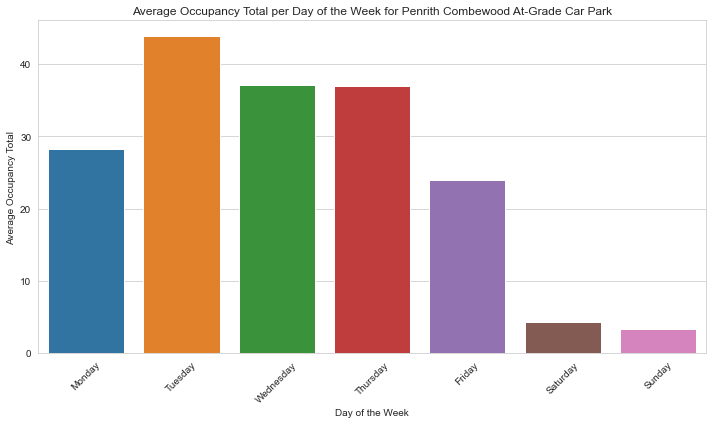

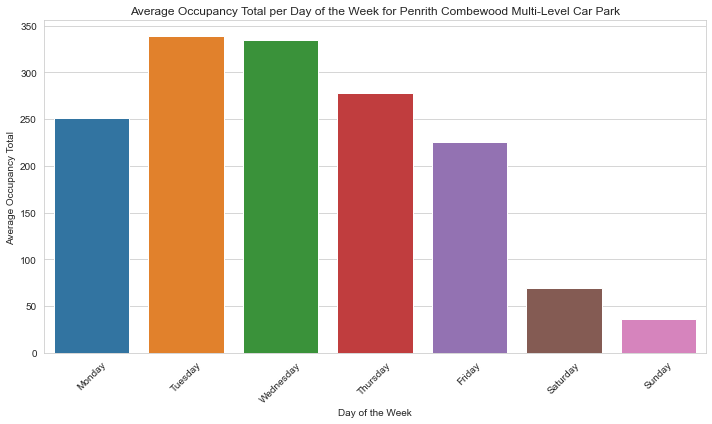

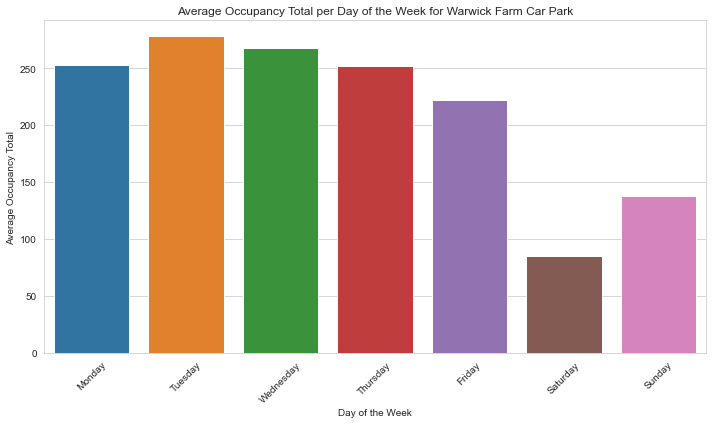

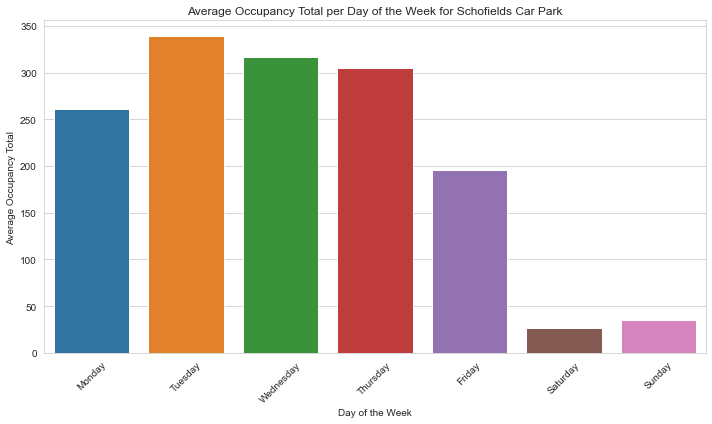

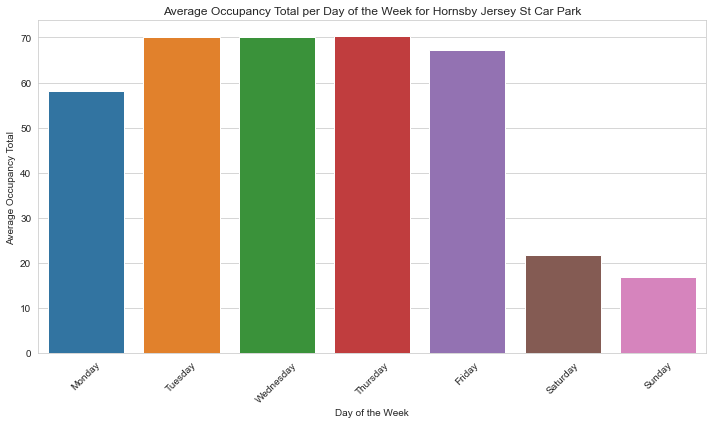

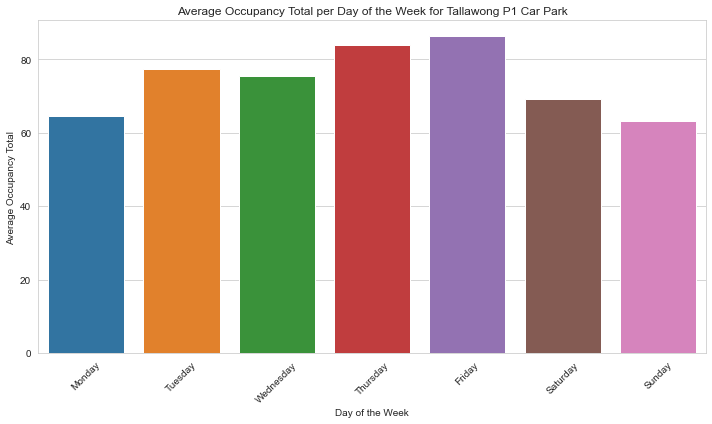

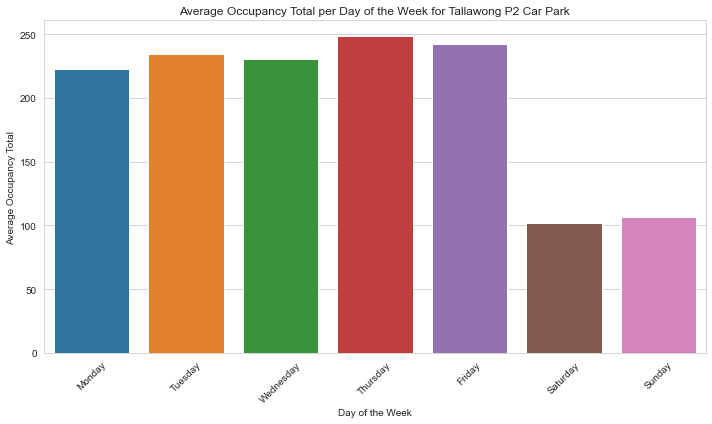

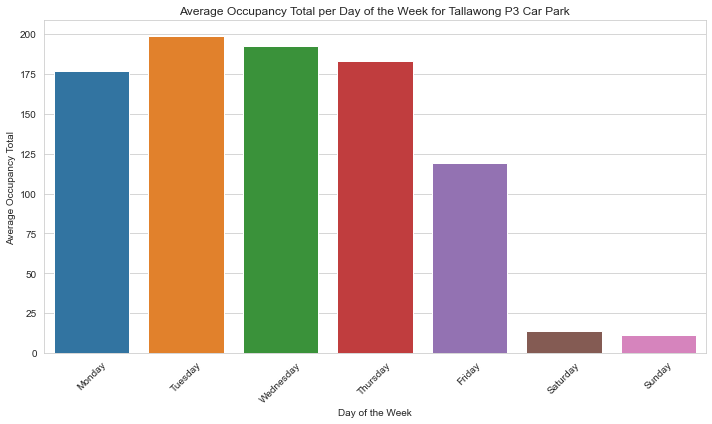

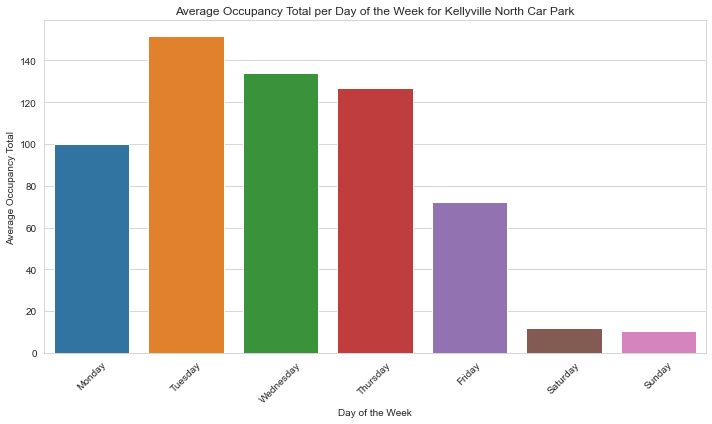

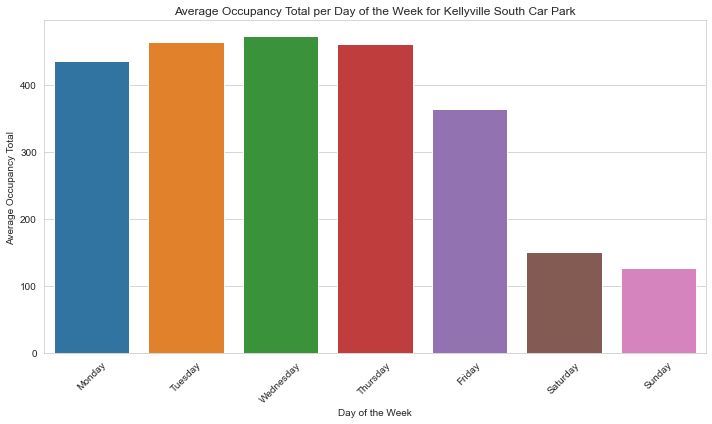

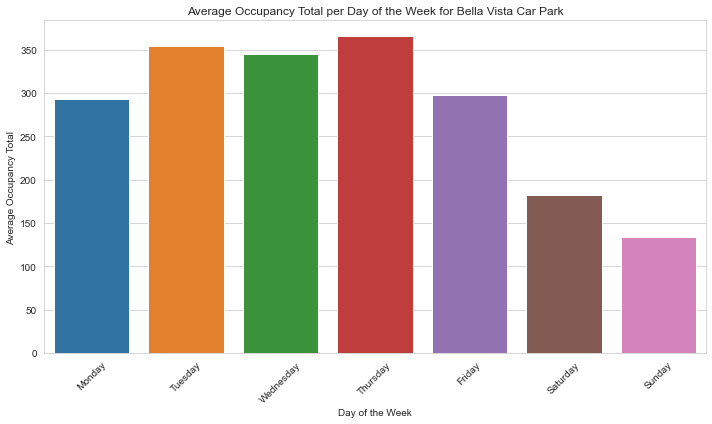

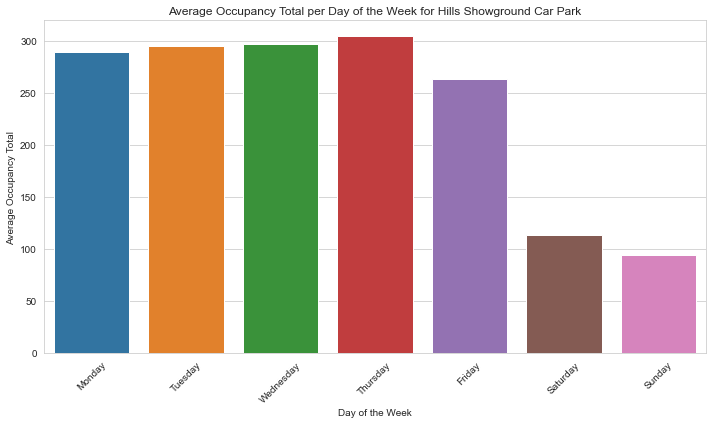

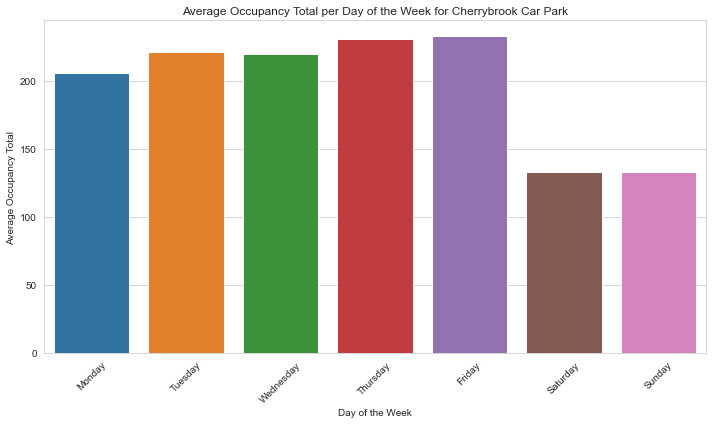

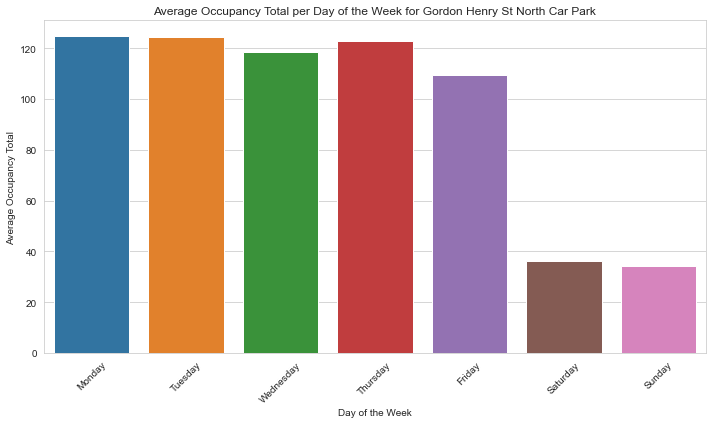

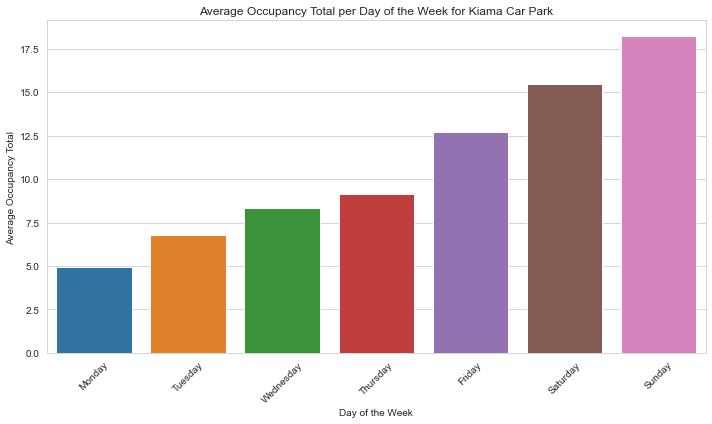

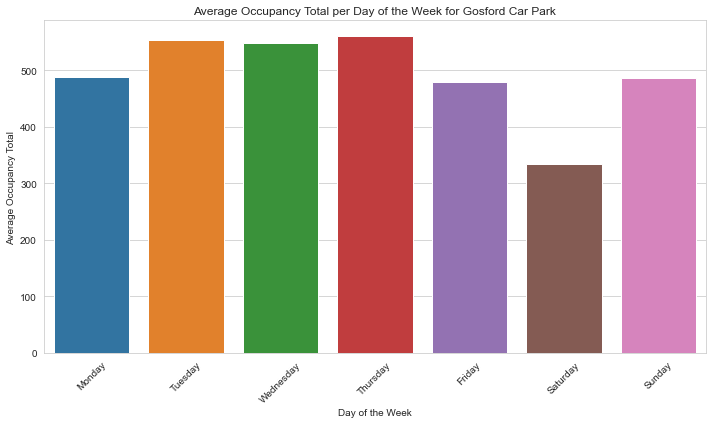

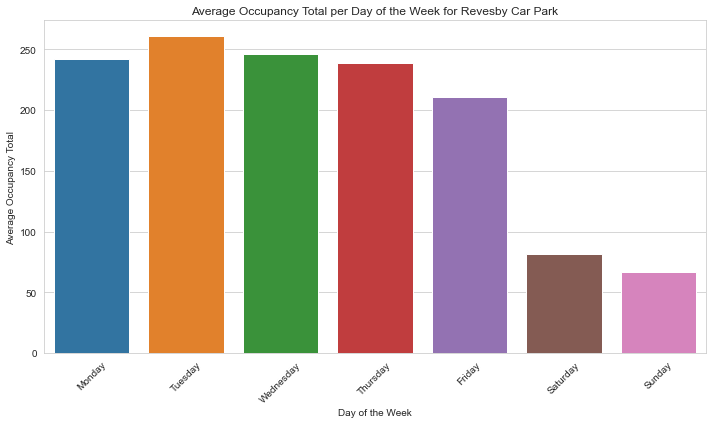

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'date' column to datetime format
final_df['date'] = pd.to_datetime(final_df['date'])

# Group by facility name and day of the week, and calculate the mean occupancy total
average_occupancy_per_facility_and_day_of_week = final_df.groupby([final_df['facility_name'], final_df['date'].dt.day_name()])['occupancy_total'].mean().reset_index()

# Define the order of the days of the week
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Iterate through each facility name
for facility_name in final_df['facility_name'].unique():
    # Filter data for the current facility
    facility_data = average_occupancy_per_facility_and_day_of_week[average_occupancy_per_facility_and_day_of_week['facility_name'] == facility_name]
    
    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    sns.barplot(x='date', y='occupancy_total', data=facility_data, order=days_of_week_order)
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Occupancy Total')
    plt.title(f'Average Occupancy Total per Day of the Week for {facility_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



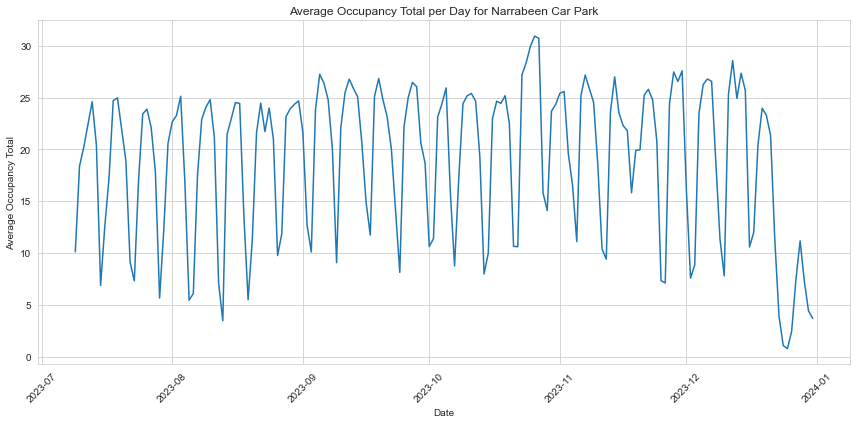

In [12]:
# Filter the data for the Narrabeen facility
narrabeen_data = final_df[final_df['facility_name'] == 'Narrabeen Car Park']

# Group by date and calculate the mean occupancy total
average_occupancy_per_day = narrabeen_data.groupby('date')['occupancy_total'].mean().reset_index()

# Plot the average occupancy per day
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='occupancy_total', data=average_occupancy_per_day)
plt.xlabel('Date')
plt.ylabel('Average Occupancy Total')
plt.title('Average Occupancy Total per Day for Narrabeen Car Park')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## __Next Steps__
1. To implement a real-time data acquisition pipeline to continuously update the model with the latest parking occupancy data.

2. To conduct pilot tests and gather feedback from end-users to assess the usability and effectiveness of the parking prediction system in real-world scenarios.

3. To deploy the finalized parking spot predictor in urban areas, collaborating with city authorities and parking management companies to integrate it into existing infrastructure and promote widespread adoption.